In [2]:
# For data analysis
import pandas as pd
import numpy as np
# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
# For visualizations and interactive dashboard creation
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

Loading Data

In [3]:
#load data
data=pd.read_csv('data/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1585 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1587 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1594 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Handling Missing Values and Duplicates

In [7]:
# Check for missing values
data.isna().sum()

fixed acidity            0
volatile acidity        14
citric acid              0
residual sugar          12
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       5
sulphates                0
alcohol                  0
quality                  0
dtype: int64

In [8]:

data['volatile acidity']=data['volatile acidity'].replace(np.NaN,0.0)
data['residual sugar']=data['residual sugar'].replace(np.NaN,0.0)
data['pH']=data['pH'].replace(np.NaN,data['pH'].mean())

In [9]:
#check whether the missing values are properly handled
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
# Drop duplicate rows
data.drop_duplicates(keep='first')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


EDA : Analysing the Distribution of Wine Quality Scores

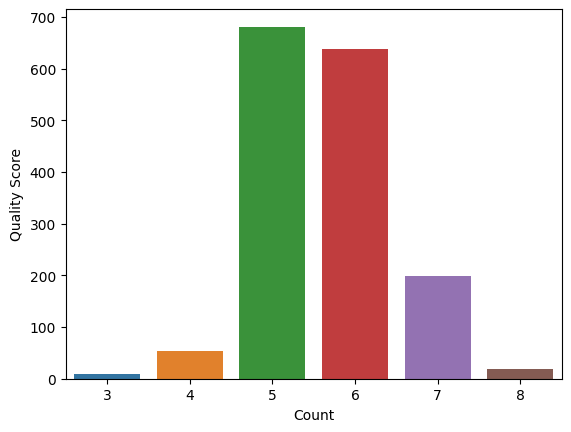

In [12]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x="quality")
plt.xlabel("Count")
plt.ylabel("Quality Score")
plt.show()

<Axes: >

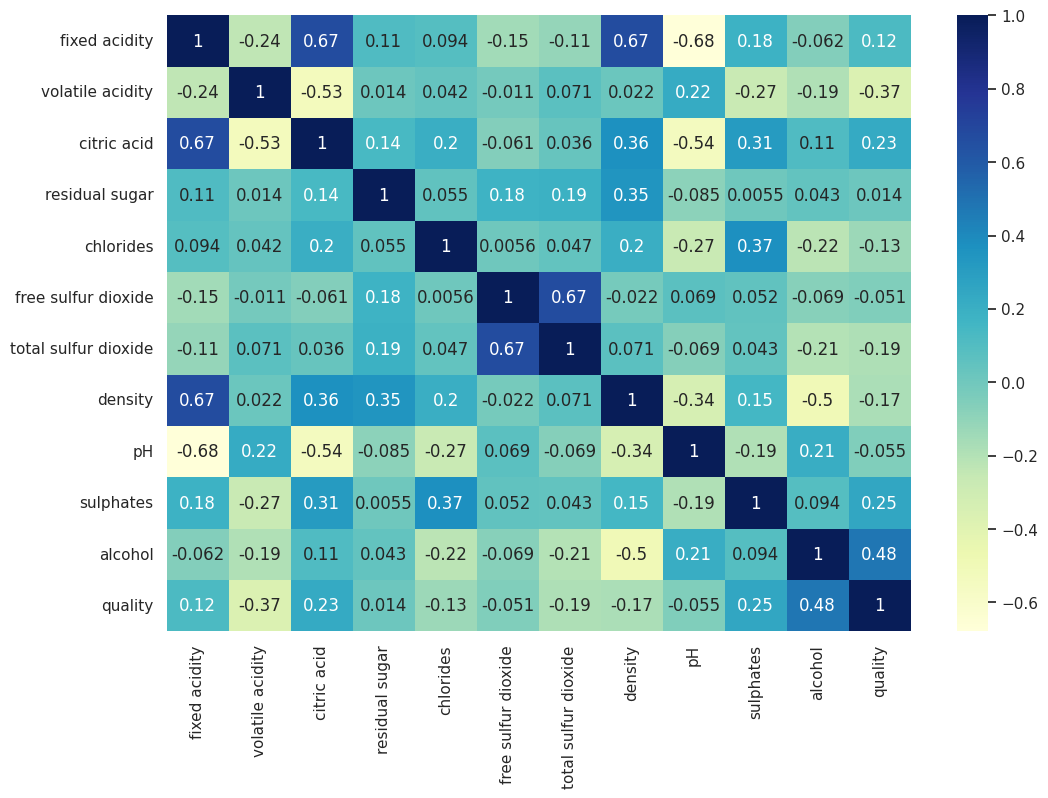

In [13]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= 'YlGnBu')

Data Preparation

In [14]:
data['quality']=data['quality'].apply(lambda x:1 if x>=6.0 else 0)

In [15]:
data['quality'].value_counts()

array([0, 1])

In [18]:
#prepare data for splitting
#drop the target variable
X=data.drop(['quality','volatile acidity','total sulfur dioxide'],axis=1)
#set the target variable as the label
y=data['quality']

In [19]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1279, 9)

In [21]:
X_test.shape

(320, 9)

In [22]:
X.shape

(1599, 9)

Modelling

In [23]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression()

In [24]:
#perform gridsearchcv to find out the best hyper parameters 
params={
    'C':[1.0,2.0,3.0,4.0],
    'penalty':['l1','l2','elasticnet'],
    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'max_iter':[500,1000,1500]
}

In [25]:
logreg_cv=GridSearchCV(logreg_model,params,cv=5)

In [26]:
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

In [27]:
# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

Model Evaluation

In [29]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

<Axes: >

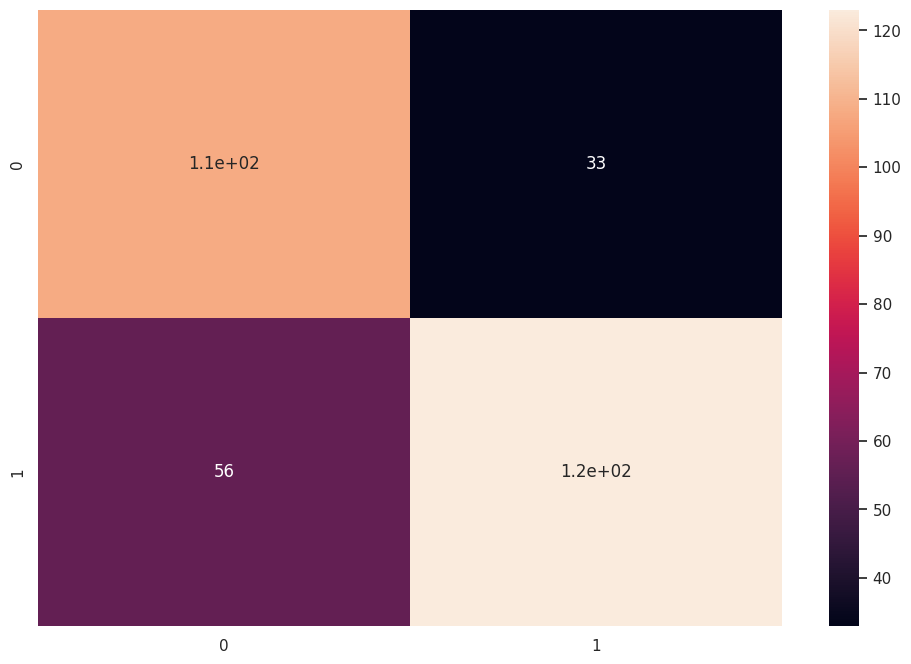

In [30]:
sns.heatmap(confusion_mat, annot=True)

In [31]:
# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Compute the precision of the model
precision = precision_score(y_test, y_pred)
# Compute the recall of the model
recall = recall_score(y_test, y_pred)
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("F1-score:",f1)

Accuracy:  0.721875
Precision: 0.7884615384615384
Recall: 0.6871508379888268
F1-score: 0.7343283582089553


In [32]:
# y_test and y_pred are the true labels and predicted scores, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

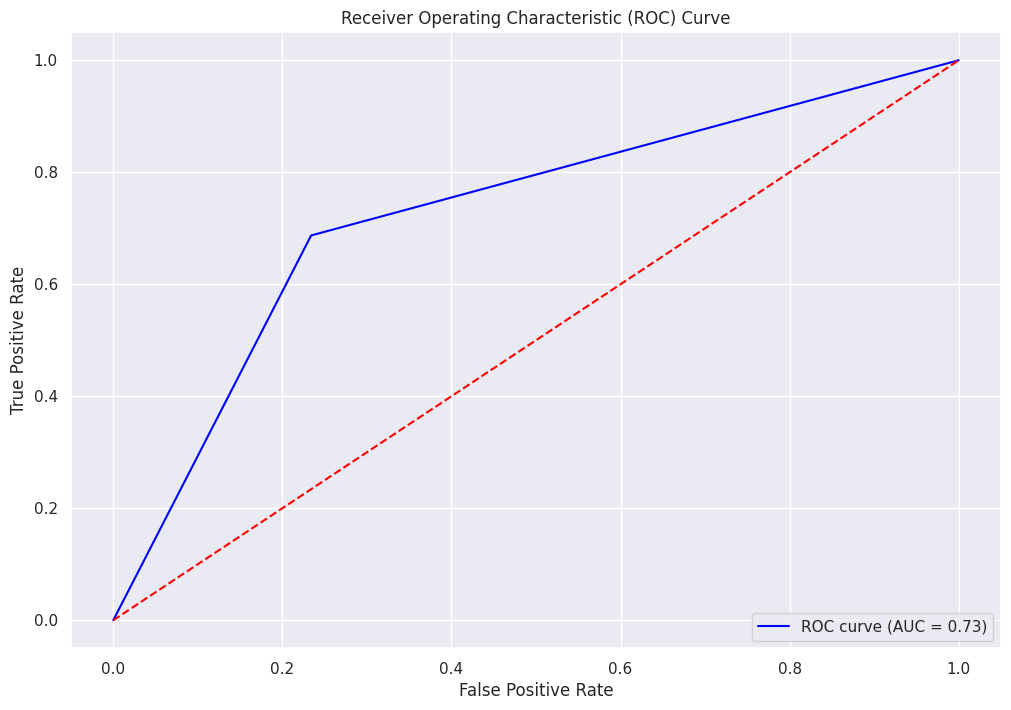

In [33]:
plt.figure(dpi=100)
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Creating an Interactive Dashboard

In [34]:
# Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div(
      children=[
          html.H1('CO544-2023 Lab 3: Wine Quality Prediction'),
          # Layout for exploratory data analysis: correlation between two selected features
          html.Div([
          html.H3('Exploratory Data Analysis'),
          html.Label('Feature 1 (X-axis)'),
          dcc.Dropdown(
          id='x_feature',
          options=[{'label': col, 'value': col} for col in data.columns],
          value=data.columns[0]
          )
          ], style={'width': '30%', 'display': 'inline-block'}),

          html.Div([
            html.Label('Feature 2 (Y-axis)'),
            dcc.Dropdown(
            id='y_feature',
            options=[{'label': col, 'value': col} for col in data.columns],
            value=data.columns[1]
            )
            ], style={'width': '30%', 'display': 'inline-block'}),

          dcc.Graph(id='correlation_plot'),

          # Layout for wine quality prediction based on input feature values
          html.H3("Wine Quality Prediction"),
          html.Div([
            html.Label("Fixed Acidity"),
            dcc.Input(id='fixed_acidity', type='number', required=True),
            html.Label("Volatile Acidity"),
            dcc.Input(id='volatile_acidity', type='number', required=True),
            html.Label("Citric Acid"),
            dcc.Input(id='citric_acid', type='number', required=True),
            html.Br(),
            html.Label("Residual Sugar"),
            dcc.Input(id='residual_sugar', type='number', required=True),
            html.Label("Chlorides"),
            dcc.Input(id='chlorides', type='number', required=True),
            html.Label("Free Sulfur Dioxide"),
            dcc.Input(id='free_sulfur_dioxide', type='number', required=True),
            html.Br(),

            html.Label("Total Sulfur Dioxide"),
            dcc.Input(id='total_sulfur_dioxide', type='number', required=True),
            html.Label("Density"),
            dcc.Input(id='density', type='number', required=True),
            html.Label("pH"),
            dcc.Input(id='ph', type='number', required=True),
            html.Br(),
            html.Label("Sulphates"),
            dcc.Input(id='sulphates', type='number', required=True),
            html.Label("Alcohol"),
            dcc.Input(id='alcohol', type='number', required=True),
            html.Br(),
          ]),
          html.Div([
            html.Button('Predict', id='predict-button', n_clicks=0),
          ]),
          html.Div([
            html.H4("Predicted Quality"),
            html.Div(id='prediction-output')
          ])
    ])

Adding Interactivity

In [35]:
# Define the callback to update the correlation plot
@app.callback(
  dash.dependencies.Output('correlation_plot', 'figure'),
  [dash.dependencies.Input('x_feature', 'value'),
  dash.dependencies.Input('y_feature', 'value')]
)

def update_correlation_plot(x_feature, y_feature):
    fig = px.scatter(data, x=x_feature, y=y_feature, color='quality')
    fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
    return fig

# Define the callback function to predict wine quality
@app.callback(
  Output(component_id='prediction-output', component_property='children'),
  [Input('predict-button', 'n_clicks')],
  [State('fixed_acidity', 'value'),
  State('volatile_acidity', 'value'),
  State('citric_acid', 'value'),
  State('residual_sugar', 'value'),
  State('chlorides', 'value'),
  State('free_sulfur_dioxide', 'value'),
  State('total_sulfur_dioxide', 'value'),
  State('density', 'value'),
  State('ph', 'value'),
  State('sulphates', 'value'),
  State('alcohol', 'value')]
)

def predict_quality(n_clicks, fixed_acidity, volatile_acidity, citric_acid,
residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
density, ph, sulphates, alcohol):
    # Create input features array for prediction
    input_features = np.array([fixed_acidity, volatile_acidity, citric_acid,
    residual_sugar, chlorides, free_sulfur_dioxide,
    total_sulfur_dioxide, density, ph, sulphates, alcohol]).reshape(1, -1)
    # Predict the wine quality (0 = bad, 1 = good)
    prediction = logreg_model.predict(input_features)[0]
    # Return the prediction
    if prediction == 1:
      return 'This wine is predicted to be good quality.'
    else:
      return 'This wine is predicted to be bad quality.'

Running the dashboard

In [40]:
if __name__ == '__main__':
  app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/



INFO:dash.dash:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:8050
INFO:werkzeug:Press CTRL+C to quit
